# 1.Import the libraries

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# 2.Reading the dataset

In [2]:
#Reading the csv file day.csv
Bike_Sharing = pd.read_csv('day.csv')

In [3]:
#Getting the first 5 rows of dataframe to inspect the data
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Shape of the dataset
print("Shape of the dataset",Bike_Sharing.shape)
#Size of data
print("Size of the dataset",Bike_Sharing.size)

Shape of the dataset (730, 16)
Size of the dataset 11680


In [5]:
#Inspect the variables and its datatypes and null values
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking for some important values from the dataset
Bike_Sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Get datatypes for each column 
Bike_Sharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### After reading and understanding the dataset we can see there are no null values present in the entire dataset and the dataset has 730 rows and 16  columns

# 3.Cleaning the data

In [8]:
#To get better inferences we can get number of days since 01-01-2018 i.e the first value in dataset 
#to check if age of the business affects the count(Target variable)
Bike_Sharing['age_of_buisness'] = (pd.to_datetime(Bike_Sharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [9]:
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,age_of_buisness
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


## => Drop a few columns

In [10]:
# We can drop "dteday" column as we have other columns like yr,mnth,wwekday and age_of_business to explain it

Bike_Sharing.drop(['dteday'], axis = 1, inplace = True)

In [11]:
Bike_Sharing.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,age_of_buisness
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [12]:
# The "instant" column can be dropped as it is just and index column and has no relation with target variable
Bike_Sharing.drop(['instant'], axis = 1, inplace = True)

In [13]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,age_of_buisness
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [14]:
# We can drop the column "casual" and "registered" as they sum up to get "cnt" column
Bike_Sharing.drop(['casual'], axis = 1, inplace = True)
Bike_Sharing.drop(['registered'], axis = 1, inplace = True)

In [15]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age_of_buisness
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


## => Handle missing values

In [16]:
#Get the number of null values in each variable
Bike_Sharing.isnull().sum()

season             0
yr                 0
mnth               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
cnt                0
age_of_buisness    0
dtype: int64

### No missing values

## => Handling outliers

In [17]:
#Get unique values of each column 
Bike_Sharing.nunique()

season               4
yr                   2
mnth                12
holiday              2
weekday              7
workingday           2
weathersit           3
temp               498
atemp              689
hum                594
windspeed          649
cnt                695
age_of_buisness    730
dtype: int64

### We can see that temp,atemp,hum,windspeed are the variables that have continuous values that means they are not categorical variables and can be checked for outliers

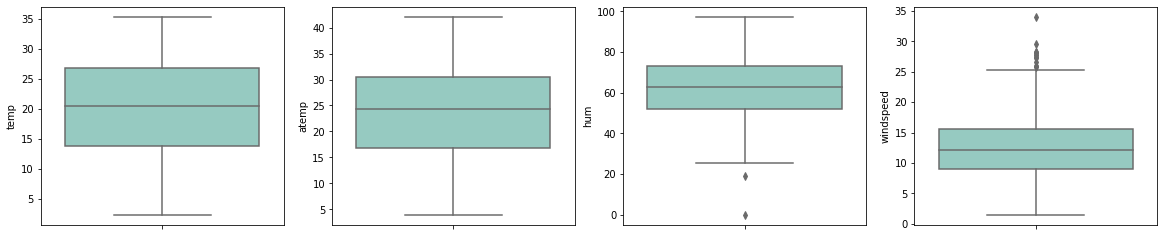

In [18]:
# Draw box plots for indepent variables with continuous values
Col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))
sns.color_palette("pastel")
i = 1
for c in Col:
    plt.subplot(1,4,i)
    sns.boxplot(y=c, data=Bike_Sharing, palette='Set3')
    i+=1

### There are no outliers as such present in these four columns - temp, atemp, hum, windspeed 

# 4. Exploratory Data Analysis (EDA)

In [19]:
Bike_Sharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [20]:
Bike_Sharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### As we can see that columns "season"  and "weathersit" have labels which indicates some order which is not the case actually hence these values need to be converted to categorical variables

## => Converting the season and weathersit to categorical variables

In [21]:
Bike_Sharing.season.replace({1:"spring", 2:"summer", 3:"autumn", 4:"winter"},inplace = True)

Bike_Sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

Bike_Sharing.mnth = Bike_Sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

Bike_Sharing.weekday = Bike_Sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age_of_buisness
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1440x2160 with 0 Axes>

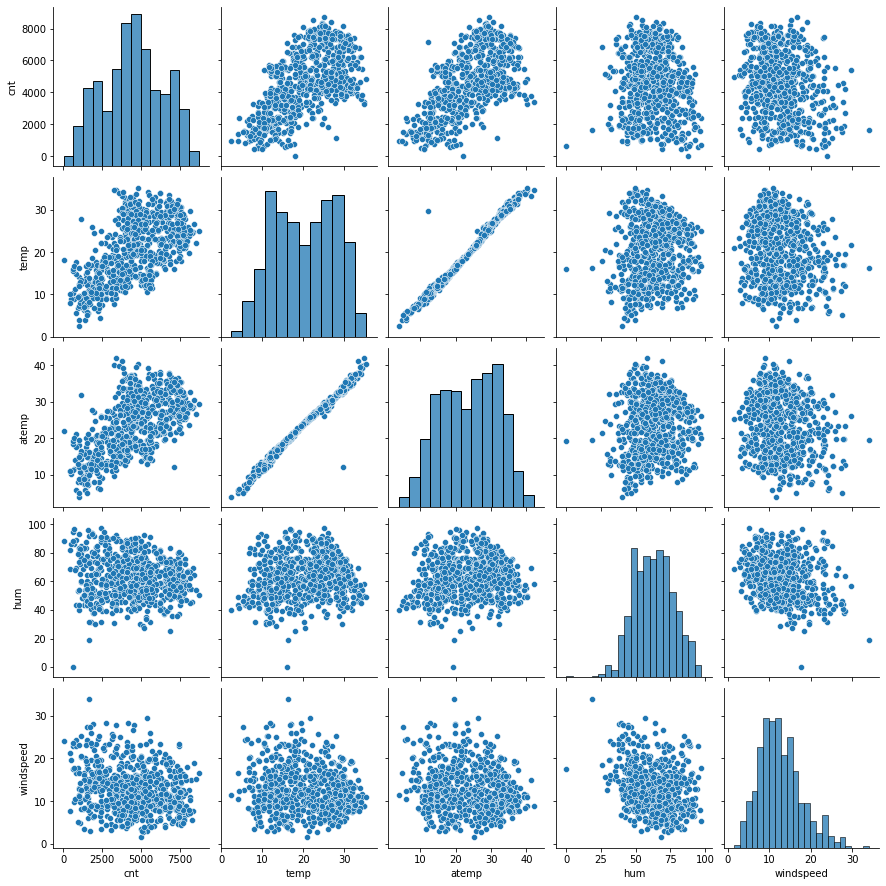

In [22]:
#Pairplots between continuous numeric variables to check how they are related
plt.figure(figsize = (20,30))
sns.color_palette("pastel")
sns.pairplot(data=Bike_Sharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'],palette="Set3")
plt.show()

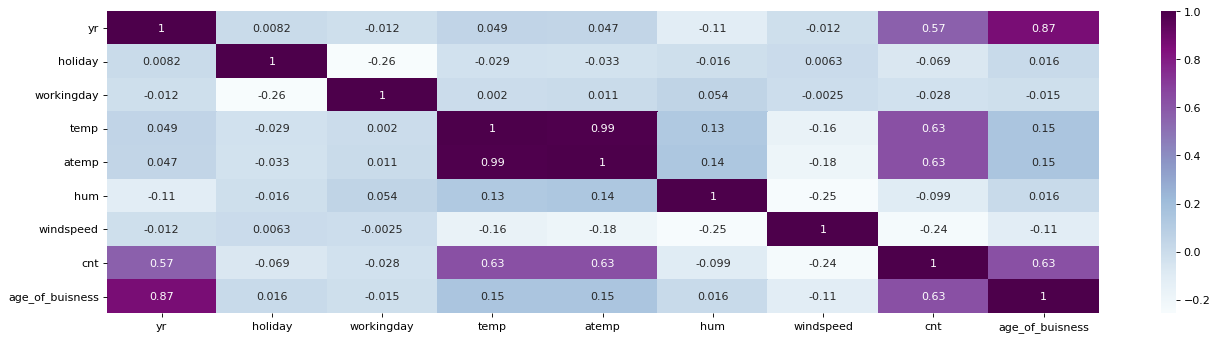

In [23]:
#Correlations for numeric variables
correlations=Bike_Sharing.corr()
fig = plt.figure(num=None, figsize=(20, 5), dpi=80, facecolor='w', edgecolor='k')
ax=sns.heatmap(correlations, annot = True,cmap="BuPu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()



### As we can see from the pair plot and the heatmap that variables "atemp" and "temp" are highly correlated with correlation of 0.99 and also the target variable "cnt" and the independent variables "atemp" and "temp" also have high correlation of 0.63

## => Categorical Variabels v/s Target variable

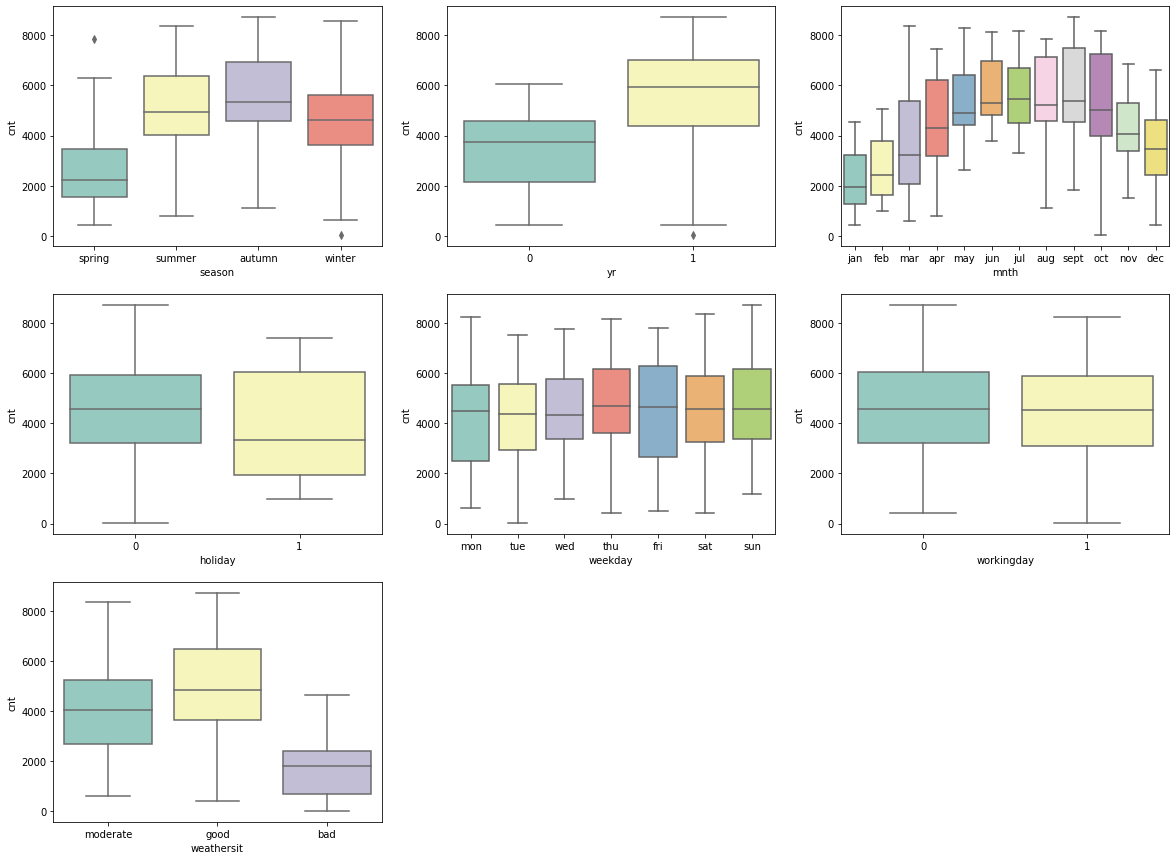

In [24]:
categorical_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 15))
for i in enumerate(categorical_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=Bike_Sharing, x=i[1], y='cnt', palette='Set3')
plt.show()

### By plotting each categorical variable against target variable we get to certain inferences:
1. During good weather situation the demand is highest
2. During Holidays the demand increases
3. Towards starting and towards the end of the year the demand is less whereas in months of august, september and october demand is high
4. In second year the demand has increased
5. Spring season has least demand

## => Numeric Variables v/s Target Variable

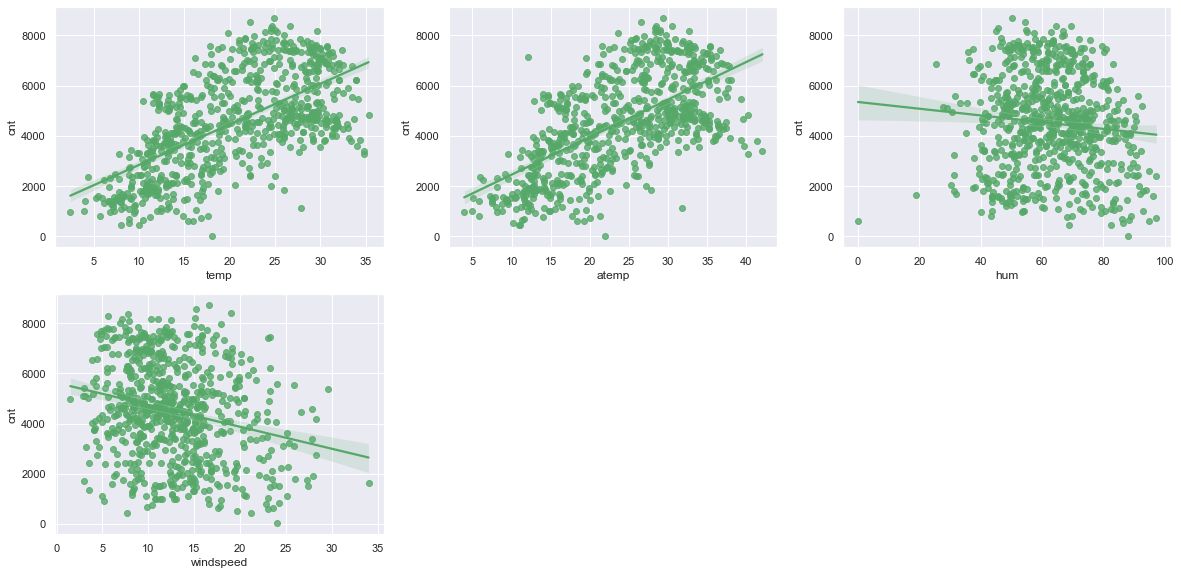

In [25]:
numeric_vars = ["temp","atemp","hum","windspeed"]
plt.figure(figsize=(20, 15))
sns.set_theme(color_codes=True)
for i in enumerate(numeric_vars):
    plt.subplot(3,3,i[0]+1)
    sns.regplot(data=Bike_Sharing,x=i[1],y='cnt',color='g')
    
plt.show()

### By plotting the numeric variables against the target variable we get following inferences

1. we can clearly see from the plots that "temp" and "atemp" has almost similar distribution and a positive linear relation with the demand for bikes ("cnt") so with increase in temp the cnt is also increasing
2. humidity seems to have negative relation with "cnt" as when humidity is increasing the "cnt" decreases

3. windspeed also has negative relation with "cnt" as with increase in windspeed the demand for bikes that is "cnt" is decreasing

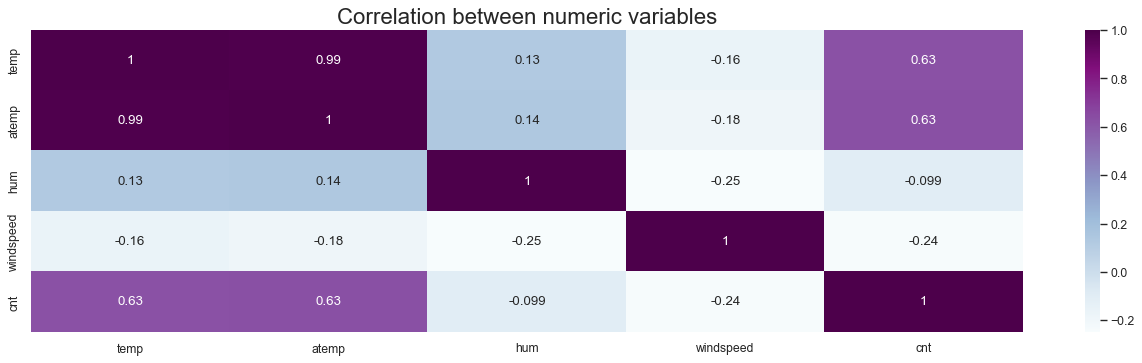

In [26]:
numeric_vars1 = ["temp","atemp","hum","windspeed","cnt"]
fig = plt.figure(num=None, figsize=(20, 5), dpi=80, facecolor='w', edgecolor='b')
ax=sns.heatmap(Bike_Sharing[numeric_vars1].corr(), annot = True,cmap="BuPu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Correlation between numeric variables", fontsize=20)
plt.show()

### From the above given heatmap we can see that "atemp" and "temp" are highly correlated and also they are highly correlated with the target variable "cnt". Although its good to analyse the VIF value to see if either "temp" or "atemp" could be dropped

# 5. Create Dummy variables for categorical variables

In [27]:
Bike_Sharing = pd.get_dummies(data=Bike_Sharing,columns=["season","mnth","weekday"],drop_first=True)
Bike_Sharing = pd.get_dummies(data=Bike_Sharing,columns=["weathersit"])

drop_first=True because only p-1 dummy variables are needed to explain all categories

In [28]:
Bike_Sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age_of_buisness,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [29]:
Bike_Sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'age_of_buisness', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

# 6. Building model

## => Splitting dataset into train set and test set

In [30]:

# splitting the dataset with a ratio of 70:30 of train and test set respectively is a good ratio
np.random.seed(0)
df_train, df_test = train_test_split(Bike_Sharing, train_size = 0.70, test_size = 0.30, random_state = 333)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 32 columns):
yr                     510 non-null int64
holiday                510 non-null int64
workingday             510 non-null int64
temp                   510 non-null float64
atemp                  510 non-null float64
hum                    510 non-null float64
windspeed              510 non-null float64
cnt                    510 non-null int64
age_of_buisness        510 non-null int64
season_spring          510 non-null uint8
season_summer          510 non-null uint8
season_winter          510 non-null uint8
mnth_aug               510 non-null uint8
mnth_dec               510 non-null uint8
mnth_feb               510 non-null uint8
mnth_jan               510 non-null uint8
mnth_jul               510 non-null uint8
mnth_jun               510 non-null uint8
mnth_mar               510 non-null uint8
mnth_may               510 non-null uint8
mnth_nov               510 non-null uint8
mnt

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 32 columns):
yr                     219 non-null int64
holiday                219 non-null int64
workingday             219 non-null int64
temp                   219 non-null float64
atemp                  219 non-null float64
hum                    219 non-null float64
windspeed              219 non-null float64
cnt                    219 non-null int64
age_of_buisness        219 non-null int64
season_spring          219 non-null uint8
season_summer          219 non-null uint8
season_winter          219 non-null uint8
mnth_aug               219 non-null uint8
mnth_dec               219 non-null uint8
mnth_feb               219 non-null uint8
mnth_jan               219 non-null uint8
mnth_jul               219 non-null uint8
mnth_jun               219 non-null uint8
mnth_mar               219 non-null uint8
mnth_may               219 non-null uint8
mnth_nov               219 non-null uint8
mnth

In [33]:
df_test.shape

(219, 32)

In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age_of_buisness,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,483,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,650,0,...,0,0,0,1,0,0,0,0,1,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,212,0,...,0,0,0,0,0,0,1,0,1,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,714,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,8,1,...,0,0,0,0,0,1,0,0,1,0


## => Scaling the continuous variables

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [36]:
numeric_vars3 = ['temp','atemp','hum','windspeed','age_of_buisness','cnt']


#Normalized scaler to scale
scaler = MinMaxScaler()

#Fitting and then transforming the training set
df_train[numeric_vars3] = scaler.fit_transform(df_train[numeric_vars3])

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age_of_buisness,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0.662551,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0.891632,0,...,0,0,0,1,0,0,0,0,1,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0.290809,0,...,0,0,0,0,0,0,1,0,1,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0.979424,0,...,0,1,0,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0.010974,1,...,0,0,0,0,0,1,0,0,1,0


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,age_of_buisness,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.500223,0.24902,...,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.633333,0.341176
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.294499,0.43287,...,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.482368,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.243141,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.501372,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.762346,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

## => Feature elimination using RFE

In [40]:
#Built linear regression model using SKLearn
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# setting number of features to 15 to start with
rfe1 = RFE(lr,15)
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [42]:
#After the selection of columns by RFE ,those columns arranged with their weightage
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('age_of_buisness', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 5),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 9),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 8),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

### The RFE (Recursive Feature Elimination) have prioritised the columns but we need to manually eliminate fews columns 

## => Manually eliminating features

In [43]:
# A function to build a model which takes columns to be build model from 
def model_building_func(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [44]:
# A function to get the vif for all columns
def vif_calc(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [45]:
# To start with the columns that have been selected by RFE for manual elimination
X_train.columns[rfe1.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'age_of_buisness',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [46]:
#Features rejected by RFE
X_train.columns[~rfe1.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_dec',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [47]:
X_training_RFE = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'age_of_buisness',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']]

In [48]:
X_training_RFE.shape

(510, 15)

# 7. Start with builing the models

## => Model 1

In [49]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'age_of_buisness',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.8
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          9.43e-184
Time:                        20:29:19   Log-Likelihood:                 499.69
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     495   BIC:                            -905.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2358    

### As the "atemp" variable has highest p-value and also the high VIF as we can see hence it is good to remove "atemp"


## => Model 2

In [50]:
# This model contains all columns except "atemp"
cols = ['yr', 'temp', 'hum', 'windspeed', 'age_of_buisness',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          7.60e-185
Time:                        20:29:19   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -971.1
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2371    

### As we can see from the above model that "weathersit_good" has highest vif as it might be correlated to some other variable in the model hence we can remove it and check

## => Model 3

In [51]:
# This model contains all columns except 'atemp','weathersit_good'
cols = ['yr', 'temp', 'hum', 'windspeed', 'age_of_buisness',
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']

model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          7.60e-185
Time:                        20:29:19   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -971.1
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4224    

### The variable "age_of_business" has a very high vif which means it has some strong correlation with other variables in the model hence it is safe to remove "age_of_business"

## => Model 4

In [52]:
# This model contains all columns except 'atemp','age_of_buisness','weathersit_good'
cols = ['yr', 'temp', 'hum', 'windspeed', 
       'season_spring', 'season_winter', 'mnth_feb', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']


model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          3.67e-182
Time:                        20:29:19   Log-Likelihood:                 490.41
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     497   BIC:                            -899.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3917    

### As we can see from model 4 that "mnth_feb" has extremey high p-value which means it is insignificant hence it can be removed safely

## => Model 5

In [53]:
# This model contains all columns except 'atemp','age_of_buisness','weathersit_good','mnth_feb'
cols = ['yr', 'temp', 'hum', 'windspeed', 
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']

model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          5.03e-183
Time:                        20:29:19   Log-Likelihood:                 489.66
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     498   BIC:                            -904.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3893    

### The "hum" variable has highest vif hence can be removed

## => Model 6

In [54]:
# This model contains all columns except 'atemp','age_of_buisness','hum','weathersit_good','mnth_feb'
cols = ['yr', 'temp', 'windspeed', 
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']



model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          1.14e-179
Time:                        20:29:19   Log-Likelihood:                 478.89
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     499   BIC:                            -889.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2869    

### The variable "season_winter" seems to be insignificant as its p value is very high hence it can be removed

## => Model 7

In [55]:
# This model contains all columns except 'atemp','age_of_buisness','hum','weathersit_good','mnth_feb','season_winter'
cols = ['yr', 'temp', 'windspeed', 
       'season_spring',  'mnth_jan', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']

model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.3
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          1.23e-180
Time:                        20:29:19   Log-Likelihood:                 478.30
No. Observations:                 510   AIC:                            -936.6
Df Residuals:                     500   BIC:                            -894.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3039    

### The variable "mnth_jan" has high p_value hence it can be removed


## => Model 8

In [56]:
# This model contains all columns except 'atemp','age_of_buisness','hum','weathersit_good','mnth_feb','season_winter','mnth_jan'
cols = ['yr', 'temp', 'windspeed', 
       'season_spring', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']

model_building_func(cols)
vif_calc(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          5.59e-181
Time:                        20:29:19   Log-Likelihood:                 476.19
No. Observations:                 510   AIC:                            -934.4
Df Residuals:                     501   BIC:                            -896.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2996    

### Inference
We can see from the above final model that VIF values are in acceptable range,also the p-values are 0.0 for all the features and we have got R2 as 0.820 and adjusted R2 as 0.817 which is almost same and also F-statistic is fairly high hence we can select the Model 8 for further analysis.



In [57]:
#Function to fit the linear regression model to all the dataframes passed 
def Build_LR_Model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [58]:

cols = ['yr', 'temp', 'windspeed', 
       'season_spring', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']

#Build a model with above columns
lr = Build_LR_Model(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.2995574699753069 [ 0.23566715  0.37455064 -0.14675699 -0.13724389  0.07059803  0.0800639
 -0.31596468 -0.07267611]


# 8. Evaluating the model

## => Analysing the residual

In [59]:
y_train_pred = lr.predict(X_train[cols])

In [60]:
#Function for plotting the histogram of residuals to check the distribution
def Residual_plot(actual, predicted):
    sns.distplot(actual-predicted)
    plt.title('Error Terms')
    plt.xlabel('Errors')

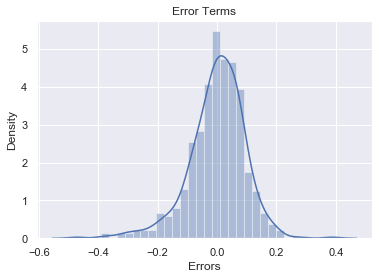

In [61]:
Residual_plot(y_train, y_train_pred)

### The residuals are normally distributed hence the modle seems to be working fine

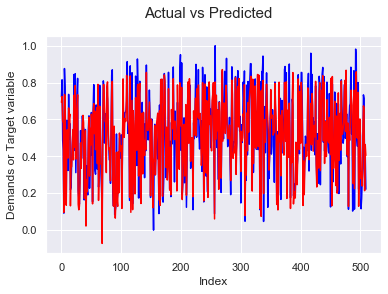

In [62]:
# Plotting Actual v/s Predicted to check how accurate is the model
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands or Target variable')
plt.show()

### Actual and predicted follow almost same pattern, hence model is working fine

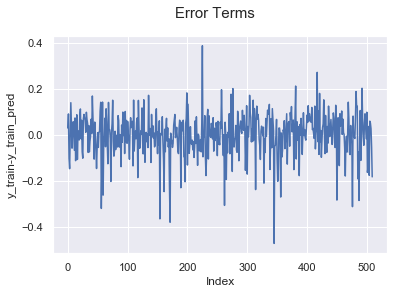

In [63]:
# To check the independence of error terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Error terms are independent of each other hence the model is good

In [64]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8197834057792083

### As we can see the r2 value is almost similar to the one we got for the model which is  0.820 

## => Check for linearity 

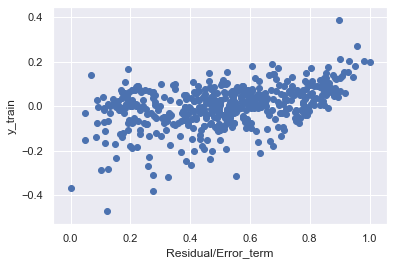

In [65]:
# plotting y_train v/s Residual/Error terms
error_term = (y_train - y_train_pred)
plt.scatter(y_train,error_term)
plt.ylabel("y_train")
plt.xlabel("Residual/Error_term")
plt.show()

## => Predicting values in test dataset

In [66]:
#Scaling the numeric variables in X_test dataset before prediction
numeric_variables = ['temp','atemp','hum','windspeed','age_of_buisness','cnt']

#Test data to be transformed only, no fitting
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])


In [67]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 31 columns):
yr                     219 non-null int64
holiday                219 non-null int64
workingday             219 non-null int64
temp                   219 non-null float64
atemp                  219 non-null float64
hum                    219 non-null float64
windspeed              219 non-null float64
age_of_buisness        219 non-null float64
season_spring          219 non-null uint8
season_summer          219 non-null uint8
season_winter          219 non-null uint8
mnth_aug               219 non-null uint8
mnth_dec               219 non-null uint8
mnth_feb               219 non-null uint8
mnth_jan               219 non-null uint8
mnth_jul               219 non-null uint8
mnth_jun               219 non-null uint8
mnth_mar               219 non-null uint8
mnth_may               219 non-null uint8
mnth_nov               219 non-null uint8
mnth_oct               219 non-null uint8
mn

In [68]:
#Taking columns from final model 8

cols_final_model = ['yr', 'temp', 'windspeed', 
       'season_spring', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']
X_test=X_test[cols_final_model]
#X_test_lm8 = sm.add_constant(X_test)

#Predict the values for test data


y_test_pred = lr.predict(X_test)

In [69]:
# R squared for test data set
r2=r2_score(y_test,y_test_pred)
r2

0.8162284805320703

In [70]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8092276607428158

### As we can see the r2 is 0.817 for test and 0.820 for train dataset, and the adjusted r2 for train is 0.817 and for test it is 0.81 as the difference is very less we can say that model will work properly for test set also .

## => Checking homoscedacity

Text(0, 0.5, 'y_test_pred')

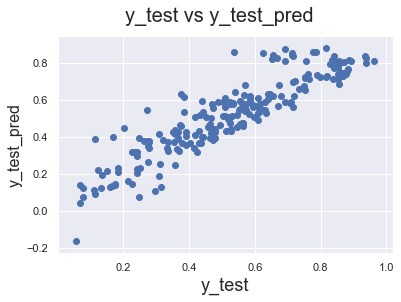

In [71]:
# Checking the spread 

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_test_pred', fontsize = 16)

### The variance of residuals is almost constant

## => Test set v/s Predicted test set

In [72]:
# function to plot the test set against predicted set of values
def actual_vs_pred(actual,predicted,scaling,dtname):
    c = [i for i in range(1,scaling,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,actual, color="green", linewidth=2.5, linestyle="-")
    plt.plot(c,predicted, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Comparison of Actual and Predicted values- '+dtname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)  

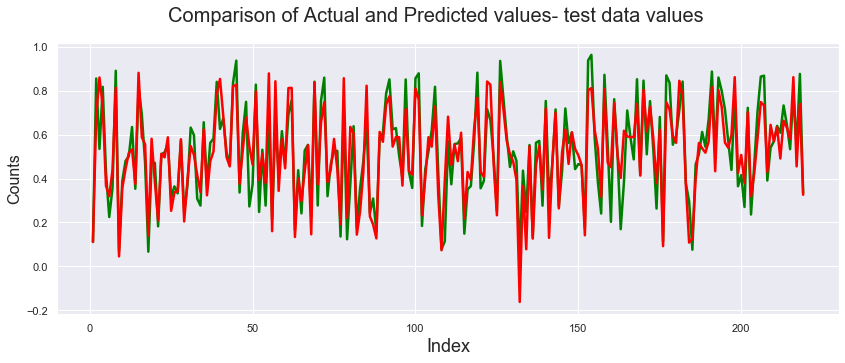

In [73]:
actual_vs_pred(y_test,y_test_pred,len(y_test)+1,'test data values')

### As we can see the red line graph for predicted values is very accurately overlapping the green line graph for the actual value hence we can say the model is good

## => Checking distribution of error terms

In [74]:
# functon to plot the distribution of Error terms
def dist_error_terms(actual,predicted):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,actual-predicted, color="red", marker='o', linewidth=4.0, linestyle="")
    fig.suptitle('Distribution of Error Terms', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Actual - Predicted ', fontsize=16)     

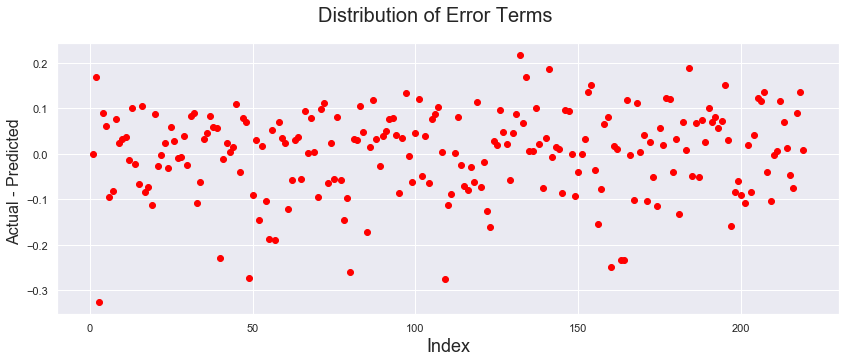

In [75]:
dist_error_terms(y_test,y_test_pred)

### The error terms are showing no pattern in distribution they are distributed randomly hence the output explains the model well

## Rebuilding the final model

In [76]:
cols = ['yr', 'temp', 'windspeed', 
       'season_spring', 'mnth_oct',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']



lm=model_building_func(cols)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          5.59e-181
Time:                        20:29:21   Log-Likelihood:                 476.19
No. Observations:                 510   AIC:                            -934.4
Df Residuals:                     501   BIC:                            -896.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2996    

## Get the final coefficients

In [77]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,9))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
2,temp,0.374551
0,const,0.299557
1,yr,0.235667
6,mnth_sept,0.080064
5,mnth_oct,0.070598
8,weathersit_moderate,-0.072676
4,season_spring,-0.137244
3,windspeed,-0.146757
7,weathersit_bad,-0.315965


### Final interpretaion of the results

1. There seems to be less demand of bikes during bad weather condition hence the company may use this time to probably service their bikes or get new bikes to replace older ones to get the customers by surprise and hence improving business after bad weather condition.

2. The temperature is affecting the business and is highly related to the demand of bikes 

3. The company should try to focus to increase their sales during Spring season

4. The customer demand might increase after year 2019 as the popularity of the business is increasing throughout 2018 and 2019

### Conclusion
Important varaiables

yr                    
temp                   
windspeed              
season_spring          
mnth_oct                
mnth_sept            
weathersit_bad        
weathersit_moderate 


### Final Result Comparison

Train R^2 :0.820

Train Adjusted R^2 :0.817

Test R^2 :0.817

Test Adjusted R^2 :0.809

This is a fair model to make predictions for unseen test data

### FINAL REPORT

As per our final Model 8, the top 3 predictor variables that affects the demand or target variable are:

Temperature (temp) - A coefficient value of ‘0.3746’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.3746  units.

weathersit_bad - A coefficient value of ‘-0.3160’ indicates that with unit increase in weathersit_bad the demand of bikes will decrease by 0.3160 units.

Year (yr) - A coefficient value of ‘ 0.2357’ indicated that a unit increase in yr variable increases the bike hire numbers by  0.2357  units.

Few more variables that play important role are:

season_Spring - A coefficient value of ‘-0.137244’ indicates that with unit increase in season_spring the demand of bikes will decrease by 0.137244 units.


windspeed - A coefficient value of ‘- 0.146757’ indicates that with unit increase in windspeed the demand of bikes will decrease by  0.146757 units.

The equation of best fitted surface based on model8:
cnt = 0.299557 + (yr × 0.235667) +  (temp × 0.374551)  + (mnth_sept x 0.080064) + (mnth_oct x 0.070598) - (weathersit_moderate	 x 0.072676) - (season_spring	x 0.137244) − (windspeed x 0.146757) − (weathersit_bad x 0.315965)

